# Sample Neural Network

Enrico Borriello - Didactic material - CAS 522 Dynamical Systems

---

In this example, we builds and trains a simple feedforward neural network using **TensorFlow** and **Keras** to classify handwritten digits from the *MNIST* dataset. It includes data loading, normalization, flattening, model definition, compilation, training, and evaluation. Finally, it prints the test accuracy to show how well the model performs on unseen data.

In a later example, we will see how this simple idea can be adapted and built upon to handle problems involving dynamical systems, once we modify our input representation.

---

In [1]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**TensorFlow** is an open-source framework for building and training machine learning models. **Keras** (bundled inside TensorFlow) provides a high-level, user-friendly API for defining and training neural networks. The **layers** module contains building blocks (such as `Dense`, `Conv2D`, and `Dropout`) that are used to construct neural network architectures.

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

This line loads the MNIST dataset, a collection of 70,000 grayscale images of handwritten digits (0–9). The dataset is automatically downloaded through Keras and split into two parts: a training set (`x_train`, `y_train`) used to teach the model, and a test set (`x_test`, `y_test`) used to evaluate its performance. Each image is 28×28 pixels, and the labels represent the digit shown in the image.

In [3]:
# Normalize the pixel values (0–255 -> 0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

This step normalizes the image data so that pixel values fall between 0 and 1 instead of 0 to 255. Converting `x_train` and `x_test` to type `float32` and dividing by 255.0 ensures the data is scaled consistently, which helps the neural network train more efficiently and improves numerical stability.

In [4]:
# Flatten 28x28 images into 784-dim vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

This step reshapes each image from a 2D array of size 28 × 28 into a 1D vector of length 784. Flattening the images (`x_train` and `x_test`) allows them to be used as inputs to a fully connected neural network, which expects feature vectors rather than 2D grids. The `-1` tells NumPy to automatically infer the number of samples.

In [5]:
# Build a simple feedforward neural network
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10 classes for digits 0–9
])

/usr/local/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This block defines a simple feedforward neural network using the Keras `Sequential` API. The model is built as a sequence of fully connected (`Dense`) layers:

- The first layer has 128 units with the ReLU activation function and takes an input vector of length 784 (the flattened image).
- The second layer has 64 units with ReLU activation to capture more complex features.
- The final layer has 10 units with a softmax activation, producing probabilities for each of the 10 digit classes (0–9).

In [6]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

This step configures the model for training. The **Adam** optimizer is chosen for efficient gradient-based optimization. The loss function `sparse_categorical_crossentropy` is used because the labels are integers representing classes (0–9), not one-hot encoded vectors. The model is also set to track accuracy as a performance metric during training and evaluation.

In [7]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8736 - loss: 0.4300 - val_accuracy: 0.9652 - val_loss: 0.1175
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9635 - loss: 0.1148 - val_accuracy: 0.9742 - val_loss: 0.0905
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9779 - loss: 0.0730 - val_accuracy: 0.9723 - val_loss: 0.0906
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9825 - loss: 0.0546 - val_accuracy: 0.9750 - val_loss: 0.0892
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9869 - loss: 0.0415 - val_accuracy: 0.9768 - val_loss: 0.0849


This line trains the neural network on the `x_train` and `y_train` data. The model is trained for 5 epochs (complete passes through the training data) with a `batch_size` of 32, meaning the weights are updated after every 32 samples. `validation_split=0.1` reserves 10% of the training data for validation, allowing the model’s performance to be monitored on unseen data during training.

In [8]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 0s - 937us/step - accuracy: 0.9757 - loss: 0.0838
Test accuracy: 0.9757


This block evaluates the trained model on the test dataset (`x_test`, `y_test`) to measure its performance on unseen data. The `model.evaluate()` method returns the loss (`test_loss`) and the accuracy (`test_acc`). Setting `verbose=2` provides a concise progress output. Finally, the test accuracy is printed to give a clear measure of how well the model generalizes to new examples.

# Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


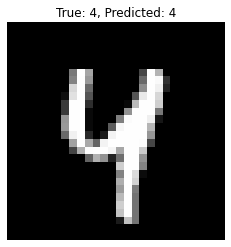

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Choose an example index
index = 42  # change this to view a different image

# Get the image and label
image = x_test[index].reshape(28, 28)  # reshape back to 28x28 for plotting
true_label = y_test[index]

# Predict with the model
pred_probs = model.predict(x_test[index].reshape(1, 784))  # reshape to match input
pred_label = np.argmax(pred_probs)

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f"True: {true_label}, Predicted: {pred_label}")
plt.axis('off')
plt.show()
